In [ ]:
"""
Author : MD Fahimul Islam
Reg No:  2017331026

"""


import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio 
from IPython.core.display import display
from scipy.fft import irfft
from scipy.fft import rfft, rfftfreq
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write
%matplotlib inline

**Audio Input:**

In [ ]:

"""
       Fahim.wav which is the audio input , is provided in the ZIP folder.

"""

wav_loc = "/content/Fahim.wav"
rate,data = wavfile.read(wav_loc)
data = data / 32768
result = data[:, 0]
DURATION = 2 
rr = result.shape
div = rr[0]
SAMPLE_RATE = int(div /DURATION)
rate, samples = wavfile.read("/content/Fahim.wav")
IPython.display.Audio(samples.T, rate=rate)



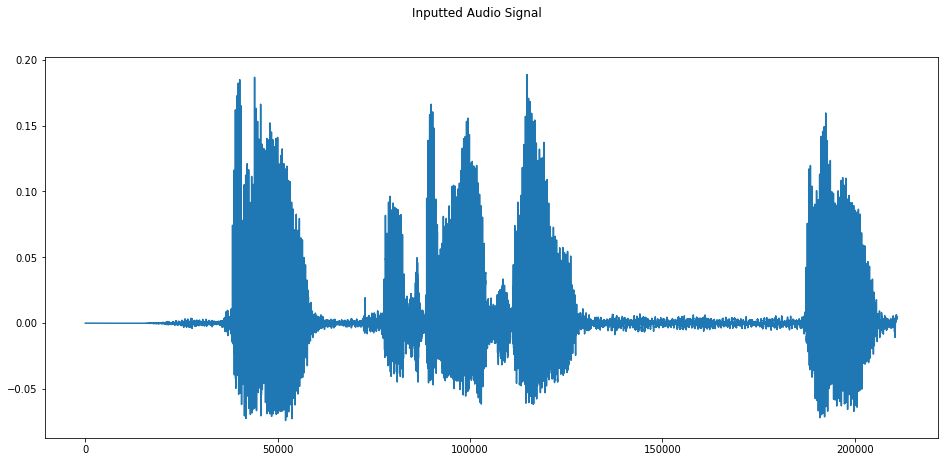

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot(result)
plt.suptitle("Inputted Audio Signal")
plt.show()

**Noise Generation:**

In [ ]:
def generate_NOISE(freq, sample_rate, duration):
  x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
  frequencies = x * freq
  phases = 1.3 * np.pi
  y = np.sin((2 * np.pi) * frequencies) 
  return x, y


In [ ]:
# noise_tone = generate_NOISE(4000, SAMPLE_RATE, DURATION)
_,noise_tone = generate_NOISE(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone

for i in range(0,len(noise_tone)):
  noise_tone[i] = noise_tone[i] + result[i]
write("noised_mixed.wav", rate, noise_tone)
rate2, samples2 = wavfile.read('/content/noised_mixed.wav')
# print(mixed_tone.shape)
IPython.display.Audio(samples2.T, rate=rate2)

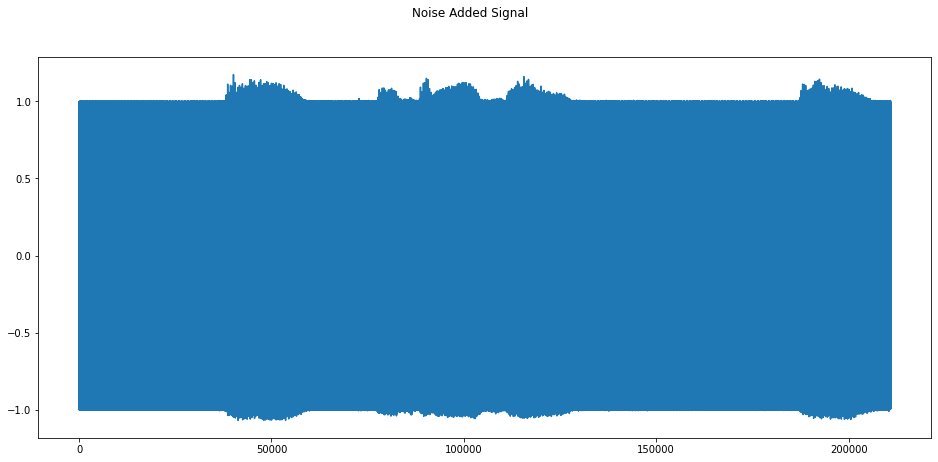

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot(noise_tone)
plt.suptitle("Noise Added Signal")
plt.show()

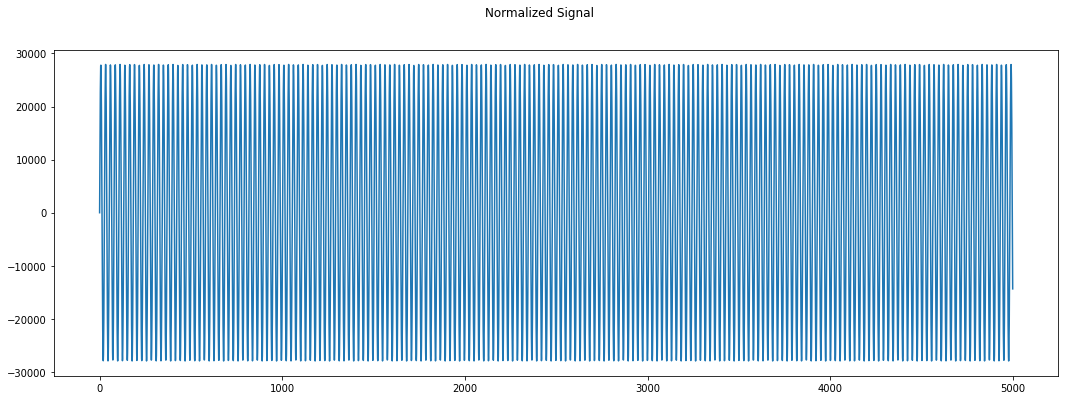

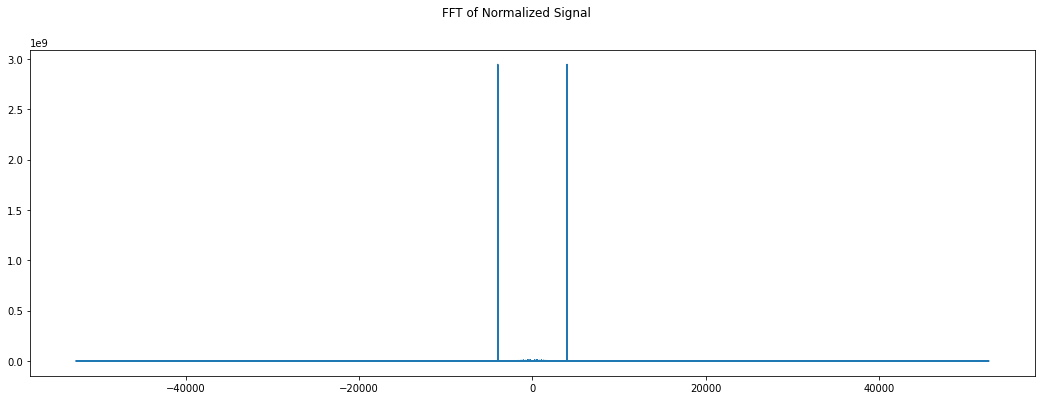

In [ ]:
normalized_tone = np.int16((noise_tone / noise_tone.max()) * 32767)

plt.figure(figsize = (18, 6))
plt.plot(normalized_tone[:5000])
plt.suptitle("Normalized Signal")
plt.show()

N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)
plt.figure(figsize = (18, 6))
plt.plot(xf, np.abs(yf))
plt.suptitle("FFT of Normalized Signal")
plt.show()


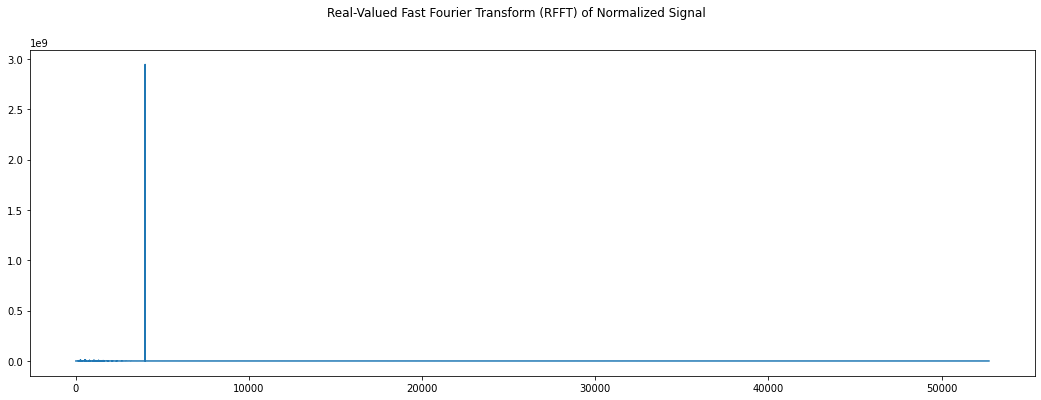

In [ ]:
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)
plt.figure(figsize = (18, 6))
plt.plot(xf, np.abs(yf))
plt.suptitle("Real-Valued Fast Fourier Transform (RFFT) of Normalized Signal")
plt.show()

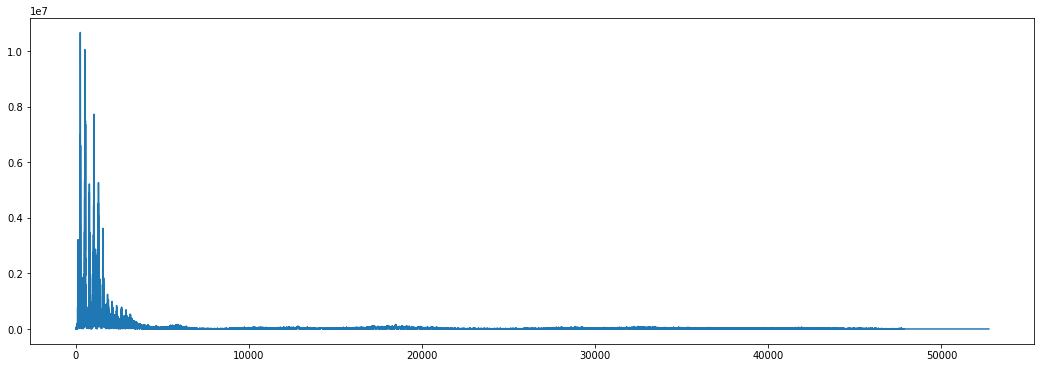

In [ ]:

points_per_freq = len(xf) / (SAMPLE_RATE / 2)
target_f=4000
target_idx = int(points_per_freq * target_f)
yf[target_idx - 1 : target_idx + 2] = 0
plt.figure(figsize = (18, 6))
plt.plot(xf, np.abs(yf))
plt.show()

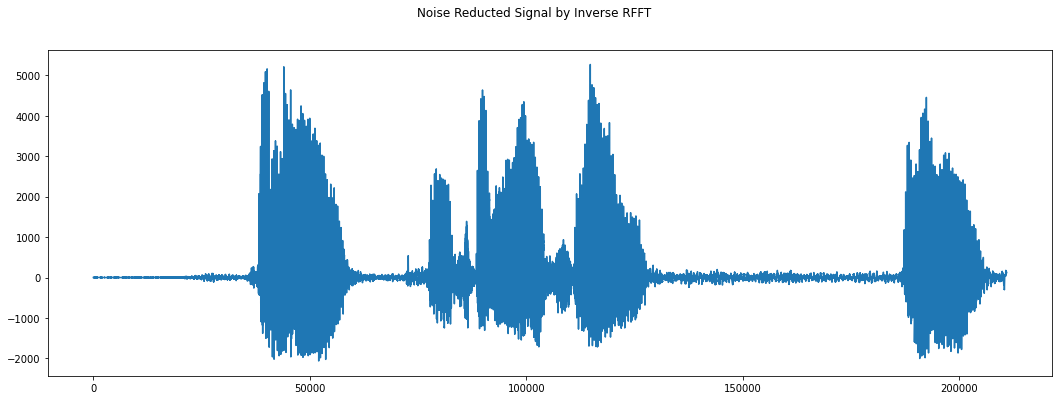

In [ ]:
new_sig = irfft(yf)

plt.figure(figsize = (18, 6))
plt.plot(new_sig)
plt.suptitle("Noise Reducted Signal by Inverse RFFT")
plt.show()

**Audio After Noise Reduction:**

In [ ]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", rate, norm_new_sig)
rate3, samples3 = wavfile.read('/content/clean.wav')
# print(mixed_tone.shape)
IPython.display.Audio(samples3.T, rate=rate3)